# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [303]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [304]:
print("Чтобы вывод на рандоме был один и тот же и у студента, и у проверяющего")

Чтобы вывод на рандоме был один и тот же и у студента, и у проверяющего


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [305]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape )

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [306]:
# your code here
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [307]:
# your code here
pd.concat([df_train.head(5), df_train.tail(5)])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [308]:
# your code here
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [309]:
# your code here

df_na = pd.DataFrame(df_train.isna().sum(), columns=['sum'])

print("Пропуски в датасете в колонках", ', '.join(df_na[df_na['sum'] != 0].index))

Пропуски в датасете в колонках mileage, engine, max_power, torque, seats


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [310]:
# your code here
df_duplicates = df_train[df_train.duplicated(
    subset=df_train.columns.difference(['selling_price']), keep=False)]
df_unique_duplicates = df_duplicates.drop_duplicates(
    subset=df_duplicates.columns.difference(['selling_price']), keep='first'
)
print('В трейне %d объектов у которых есть дубли, вместе с дублями их %d' 
      % (df_unique_duplicates.shape[0], df_duplicates.shape[0]))

В трейне 640 объектов у которых есть дубли, вместе с дублями их 1799


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [311]:
# your code here
df_unique_duplicates.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
31,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44 km/kg,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0
32,Maruti Alto K10 VXI Airbag,2019,366000,15000,Petrol,Individual,Manual,First Owner,23.95 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
33,Hyundai Verna VTVT 1.6 SX Option,2019,1149000,5000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1591 CC,121.3 bhp,151Nm@ 4850rpm,5.0
35,Tata Safari DICOR 2.2 LX 4x2,2011,425000,60000,Diesel,Individual,Manual,Second Owner,13.93 kmpl,2179 CC,138.03 bhp,320Nm@ 1700-2700rpm,7.0
36,Maruti 800 Std,2012,150000,76000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [312]:
# your code here
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')

In [313]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [314]:
# your code here
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [315]:
# your code here
import re

def units_convert(frames):
    for frame in frames:
        frame['mileage'] = frame.mileage.str.replace(r'kmpl|km/kg', '', regex=True).astype(float)
        frame['engine'] = frame.engine.str.replace('CC', '').astype(float)
        frame['max_power'] = frame.max_power.str.replace('bhp', '')
        frame['max_power'] = frame.max_power.astype(str).apply(
            lambda x: np.NAN if x.strip() == '' else float(x)).astype(float)
        
def converter_max_torque(x):
    a = re.findall(r'(\d*\.?\d+)', x)
    if not len(a):
        return np.NAN
    return a[1] + a[2] if '+/-' in x else a[-1] 

def converter_torque(x):
    a = re.findall(r'(\d*\.?\d+)', x)
    if not len(a):
        return np.NAN
    return round(float(a[0]) * 9.80665, 2) if 'kg' in x else a[0]

def convert_torque(frames):
    for frame in frames:
        frame['torque'] = frame['torque'].astype(str).apply(lambda x: x.replace(',', ''))
        frame['max_torque_rpm'] = frame['torque'].apply(converter_max_torque).astype(float)
        frame['torque'] = frame['torque'].apply(converter_torque).astype(float)
    
units_convert([df_train, df_test])
convert_torque([df_train, df_test])

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [316]:
# your code here
def fetch_na_columns(frame):
    frame_na = pd.DataFrame(frame.isna().sum(), columns=['sum'])
    columns_na = frame_na[frame_na['sum'] != 0].index
    return columns_na

def fill_median(frames, columns):
    train_medians = dict(zip(columns, [frames[0][column].median() for column in columns]))
    for frame in frames:
        frame.fillna(train_medians, inplace=True)

na_columns = fetch_na_columns(df_train)
fill_median([df_train, df_test], na_columns)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [317]:
print("С одной стороны в колонке seats значения порядковые, т.е. 4-х местная машина ближе к 5-ти местной, чем к 2-х местной. Но с другой стороны 4-x местные авто могут иметь большой разброс по цене с 5-ти местными неизвестно в какую сторону - зависимость нелинейная, поэтому это скорее категориальная переменная")

С одной стороны в колонке seats значения порядковые, т.е. 4-х местная машина ближе к 5-ти местной, чем к 2-х местной. Но с другой стороны 4-x местные авто могут иметь большой разброс по цене с 5-ти местными неизвестно в какую сторону - зависимость нелинейная, поэтому это скорее категориальная переменная


In [318]:
# your code here
def convert(frames, columns, to_type):
    for df in frames:
        for column in columns:
            df[column] = df[column].astype(to_type)

convert([df_train, df_test], ['engine', 'seats'], int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

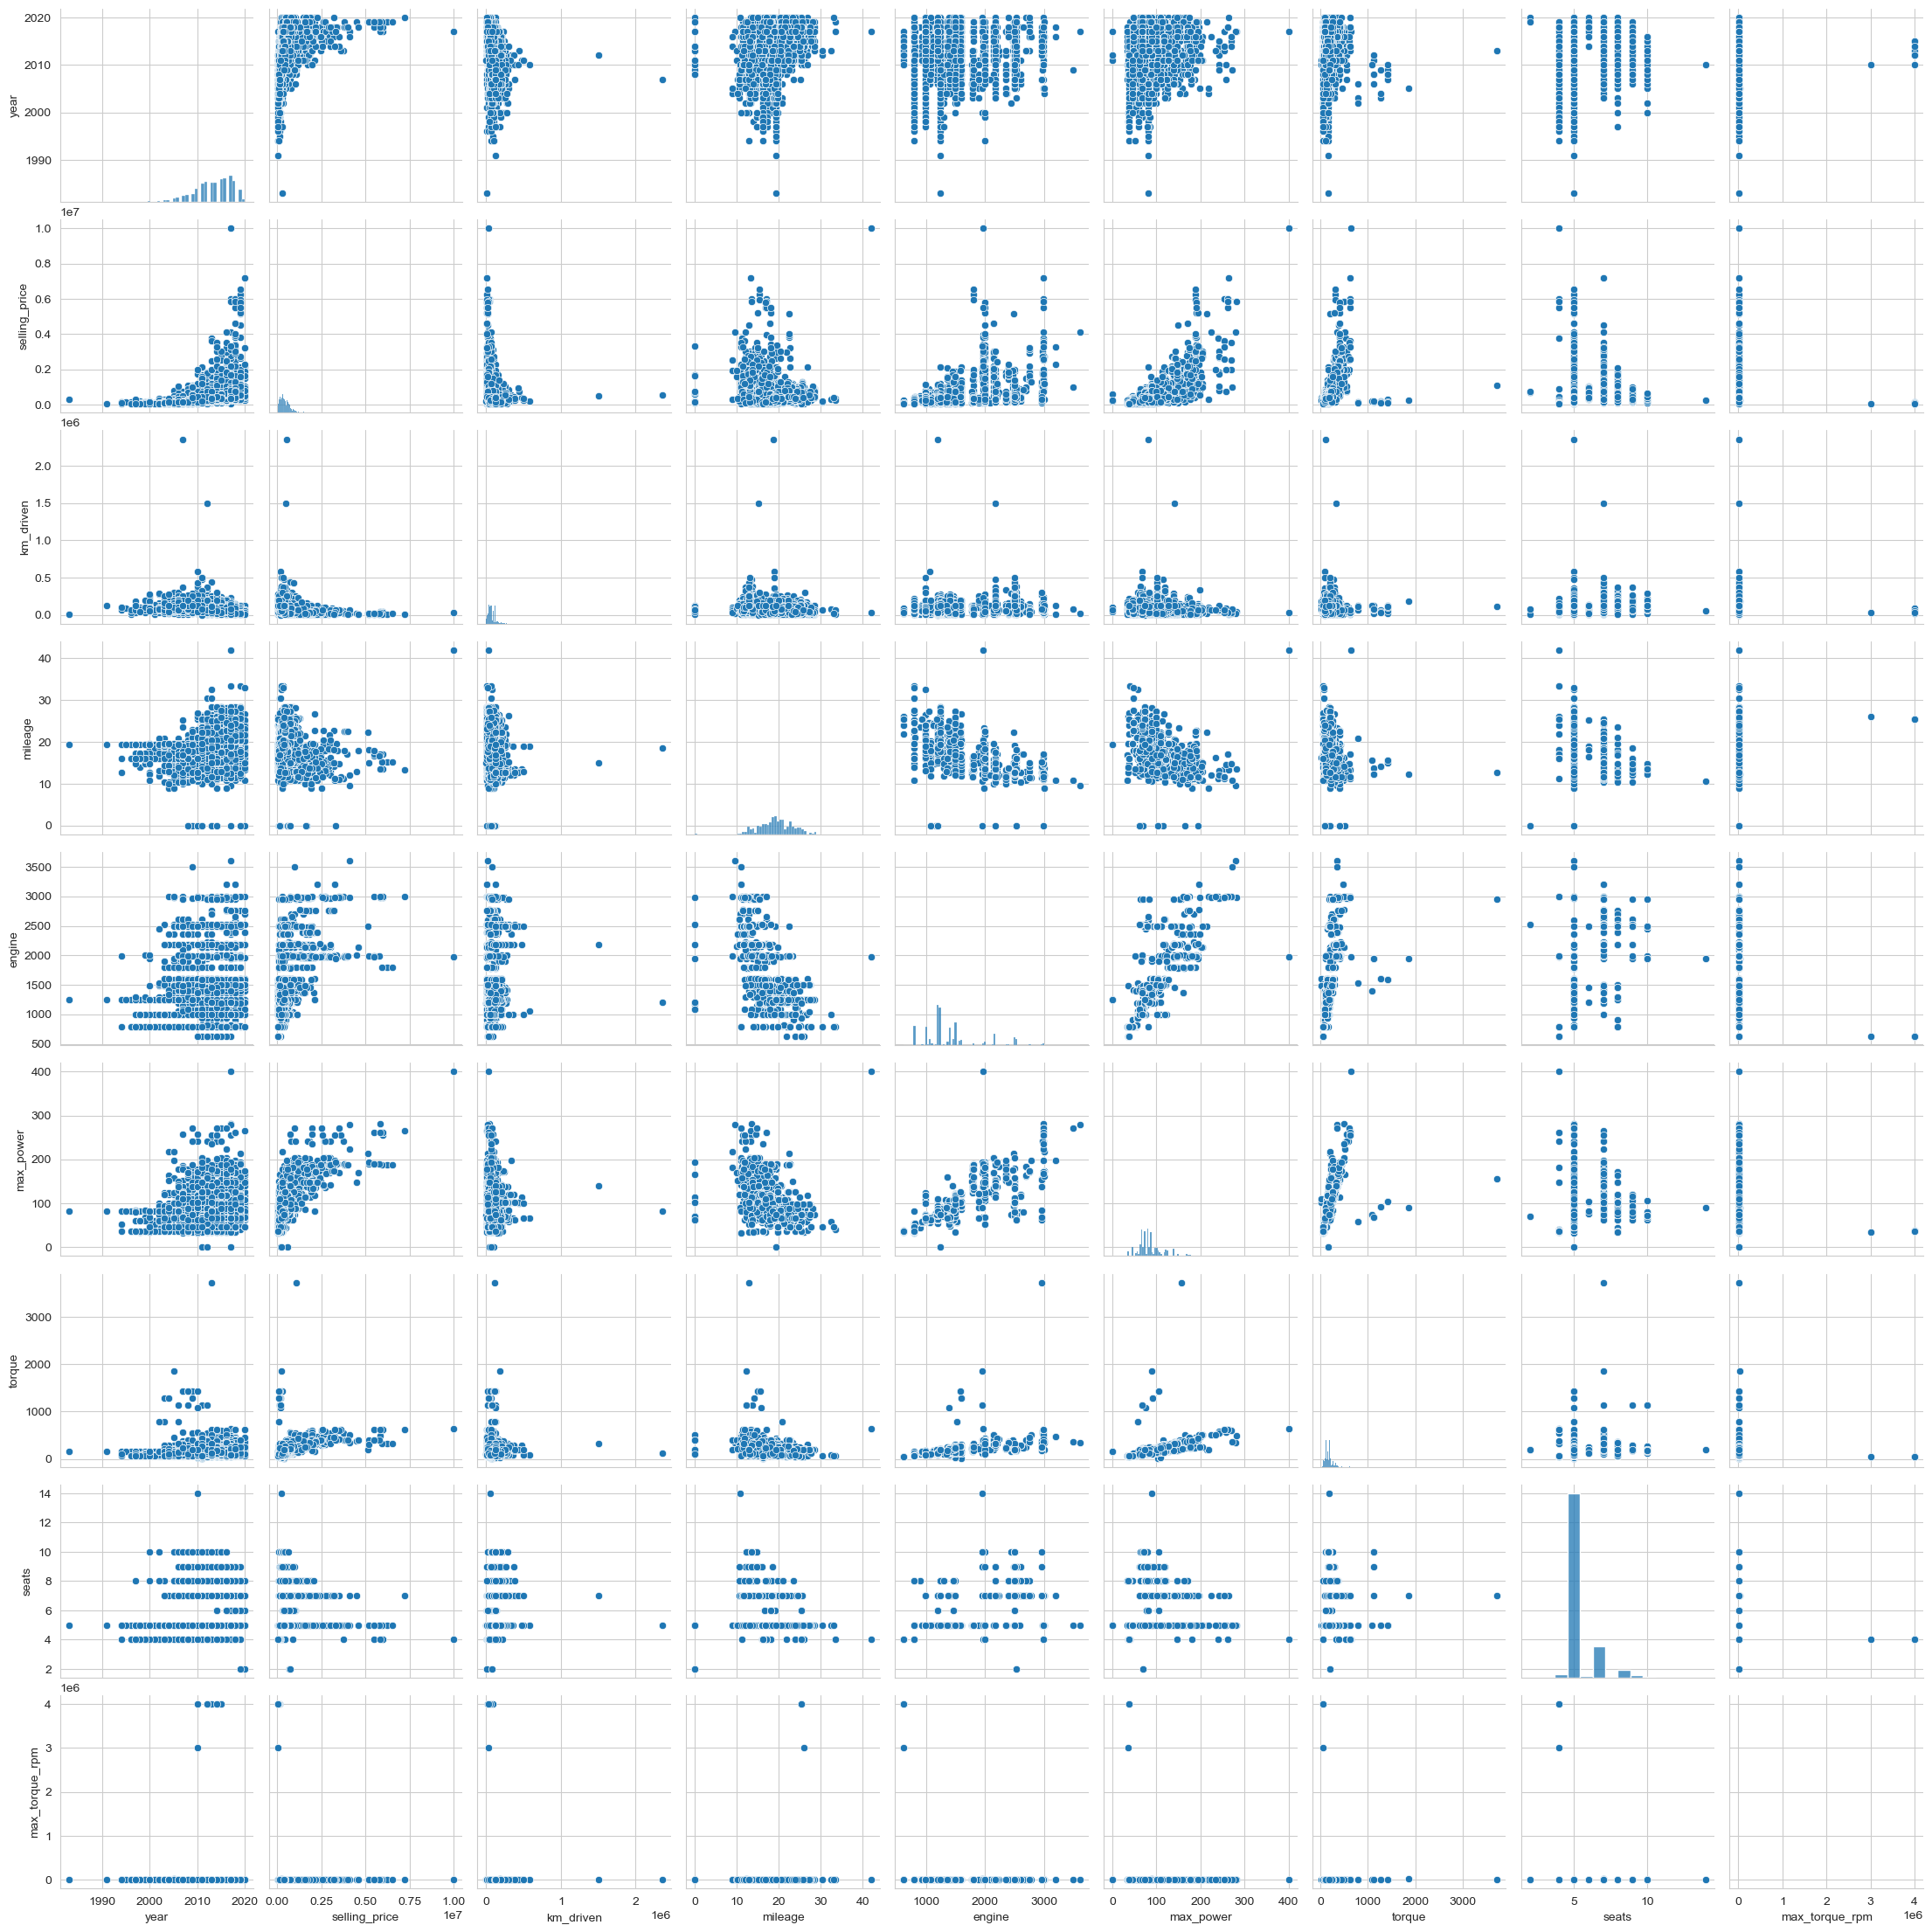

In [319]:
# your code here

_ = sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Ответы: 
* <font color='#006400'>На графиках лучше всех видна корреляция между целевой переменной selling_price и крутящим моментом torque за исключением некоторых выбросов. И нелинейная корреляция между selling_price и max_power.</font>
* <font color='#006400'>Если смотреть корреляцию между признаками, то видна линейная зависимость между max power и torque, что логично т.к. по сути это описания похожих свойств двигателя.</font>

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

Некоторые зависимости между признаками в тестовых и тренировочных данных распределены иначе, вероятно это можно объяснить тем, что размер тестовой выборки значительно меньший чем трейн


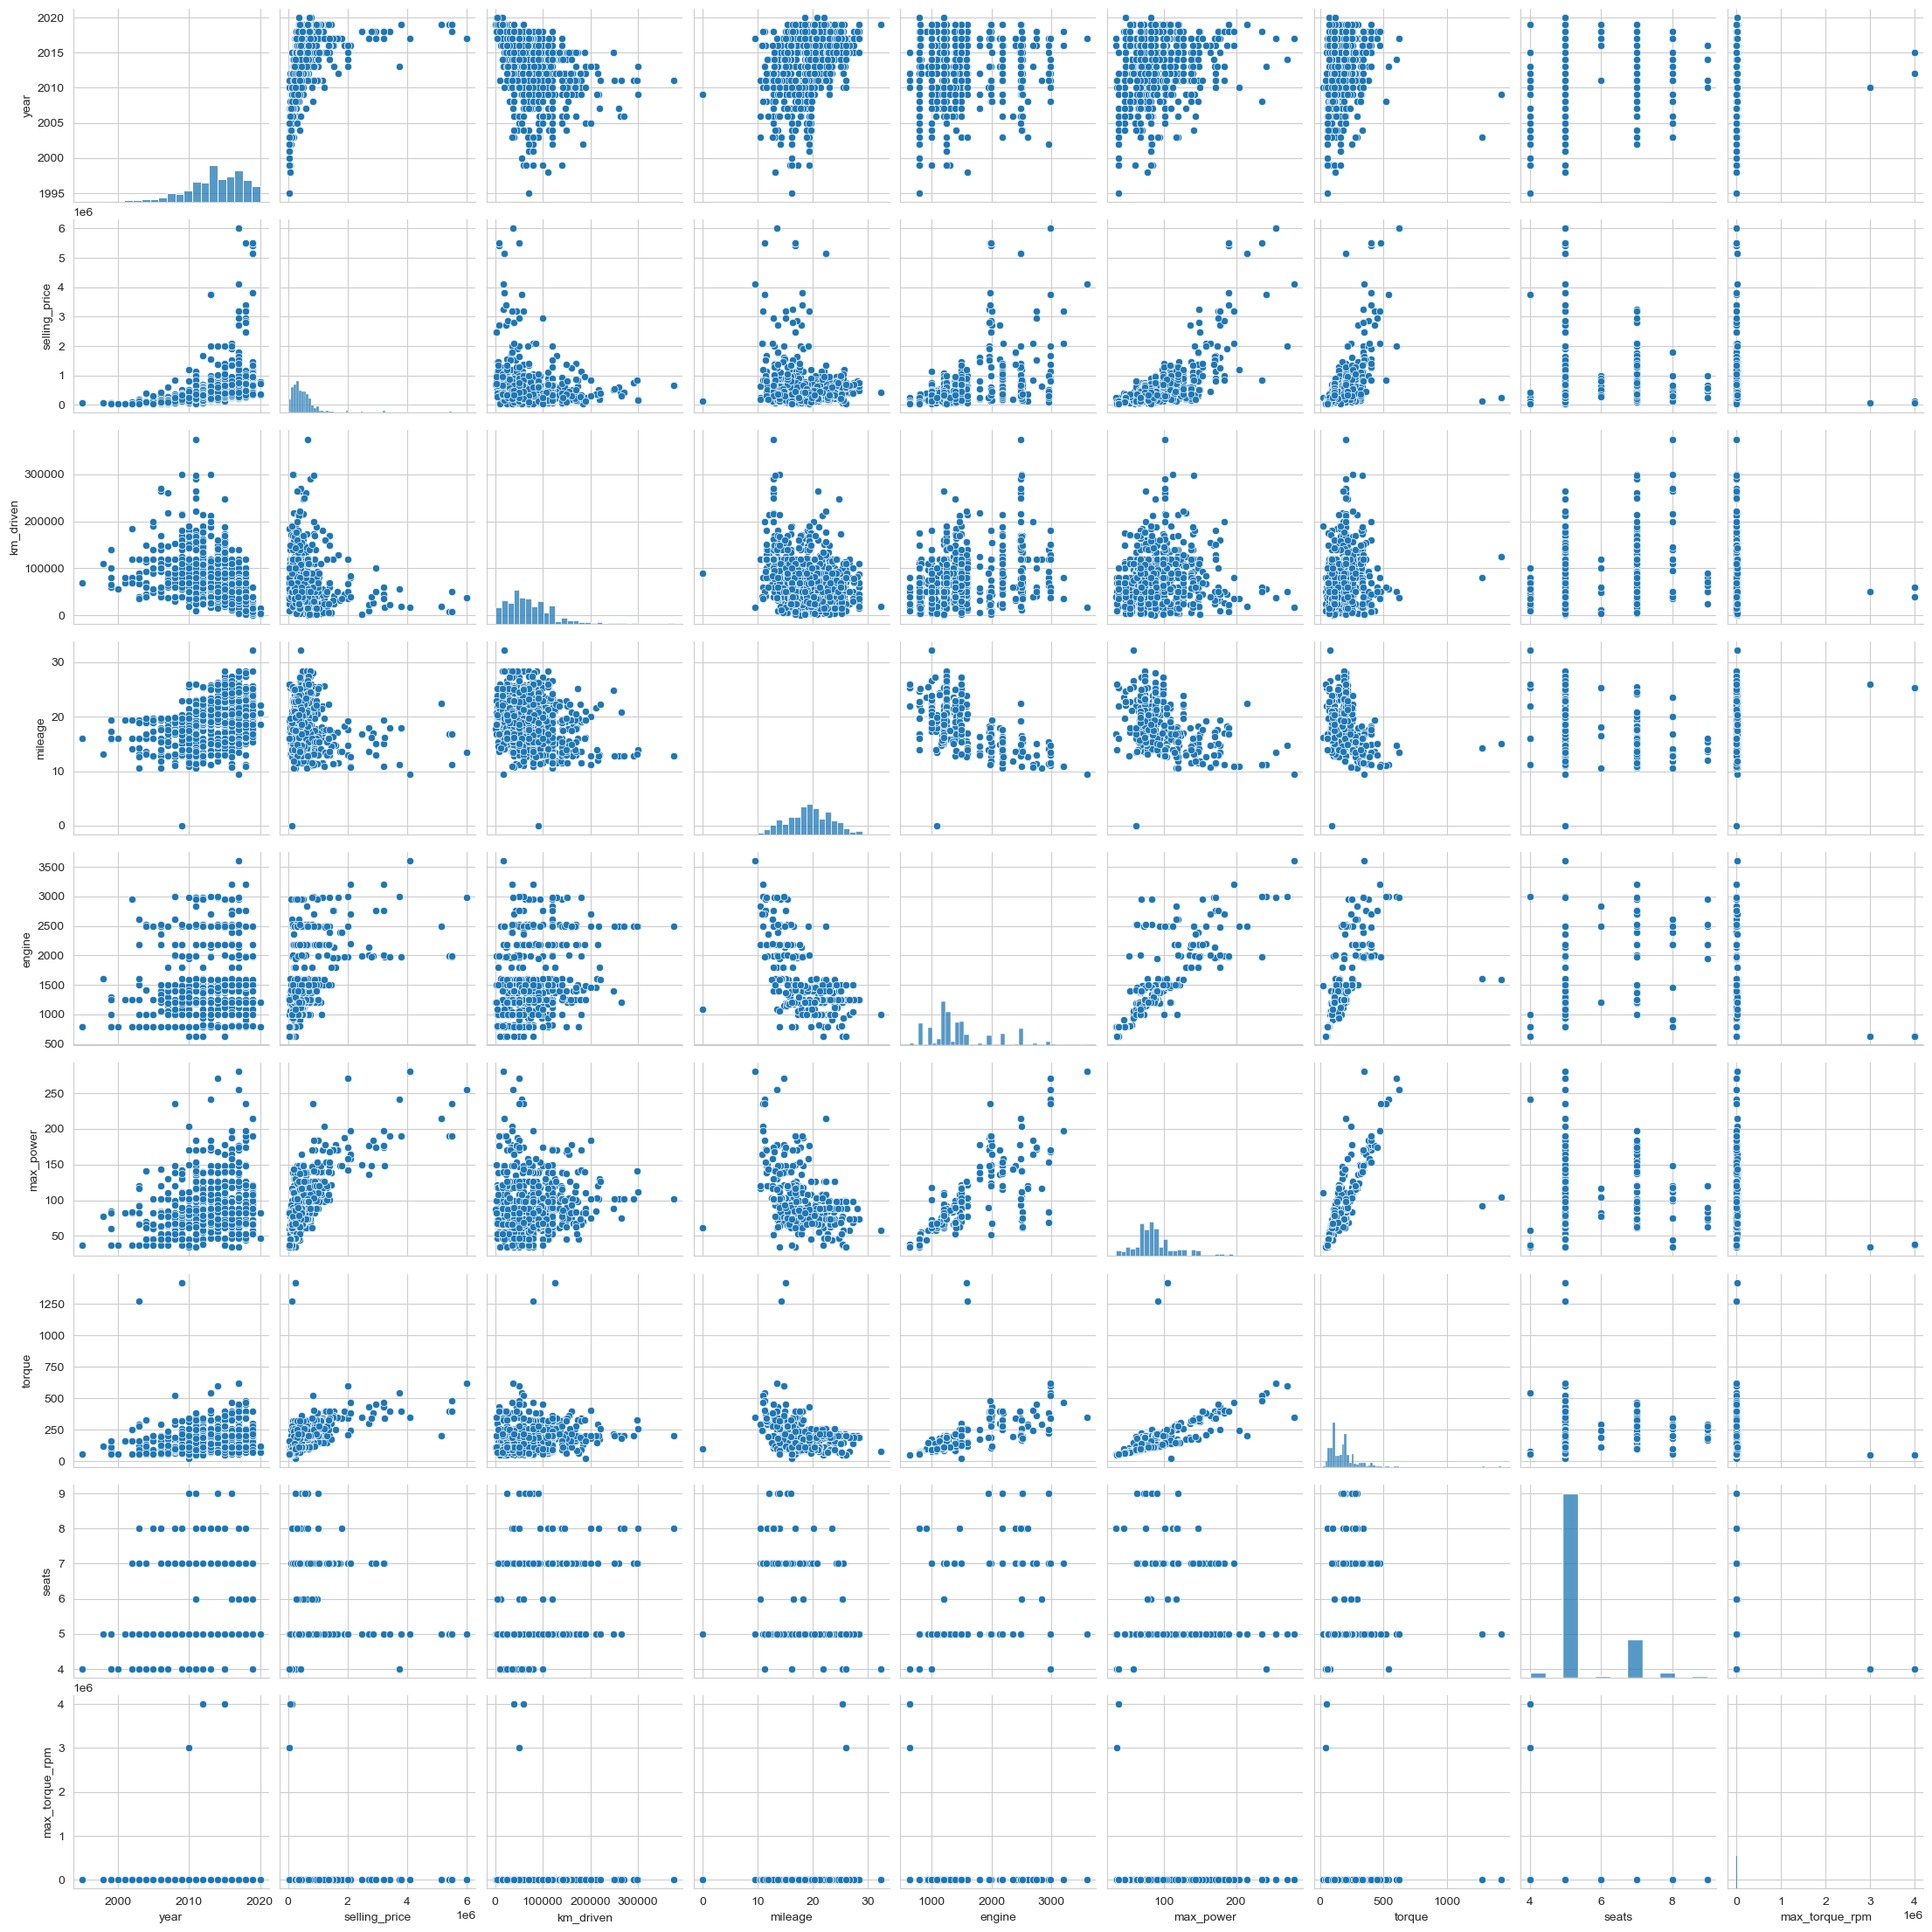

In [320]:
# your code here
print('Некоторые зависимости между признаками в тестовых и тренировочных данных распределены иначе, вероятно это можно объяснить тем, что размер тестовой выборки значительно меньший чем трейн')
_ = sns.pairplot(df_test)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

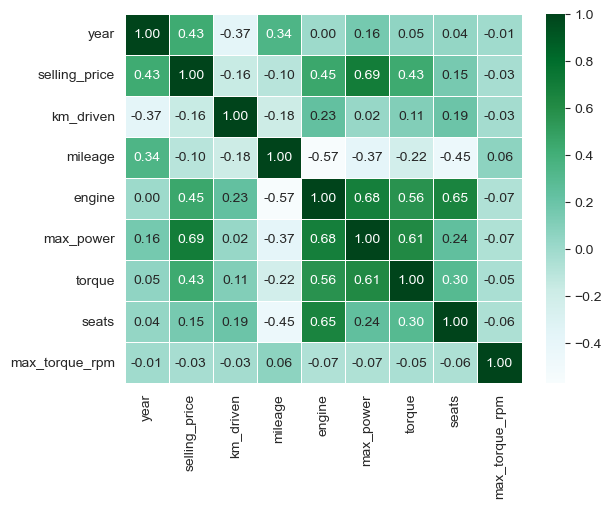

In [321]:
# your code here
df_numeric = df_train.select_dtypes(include=['int64', 'float64'])
_ = sns.heatmap(df_numeric.corr(), cmap='BuGn', annot=True, linewidths=0.5, fmt=".2f")

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

Ответы: 
* <font color='#006400'>max_torque_rpm и year наименее скоррелированы между собой.</font>
* <font color='#006400'>max_power и torque имеют довольно сильную положительную линейную зависимость</font>
* <font color='#006400'>Между годом и пробегом (km_driven) авто коэффициент корреляции -0.37, это средняя обратная корреляция, так что в какой-то степени правильно будет так утверждать</font>

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

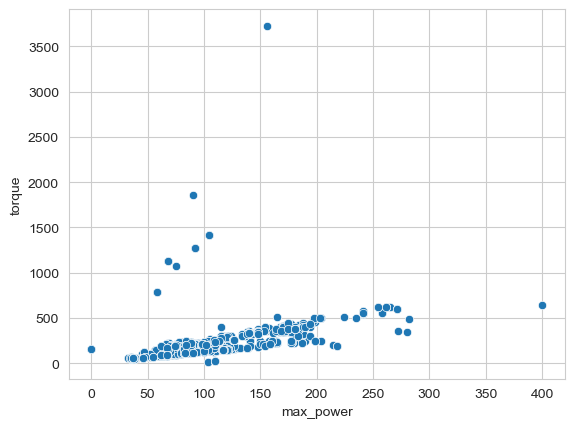

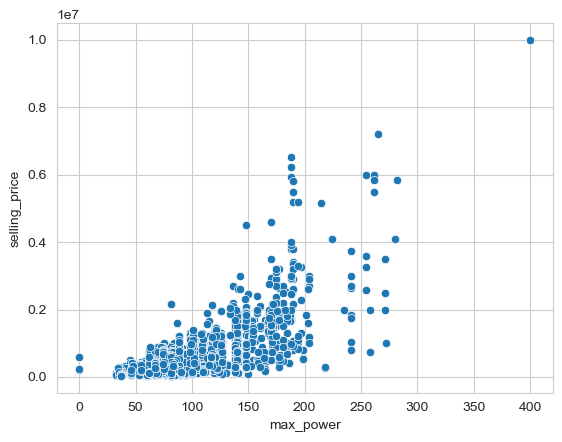

In [322]:
# your code here
_ = sns.scatterplot(data=df_train, x='max_power', y='torque') # не считая некоторых выбросов, практически линейно зависимы
plt.figure()
_ = sns.scatterplot(data=df_train, x='max_power', y='selling_price') # если считать, что целевая переменная до ее отделения от датасета тоже является признаком

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<font color='#006400'>Цены по каждому из категориальных признаков выше определенного порога можно считать выбросами. Чем выше этот порог, тем меньше модель переобучится.</font>

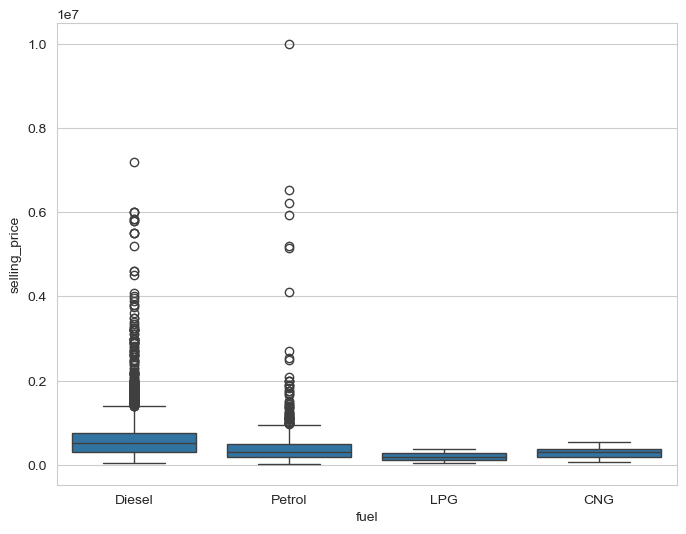

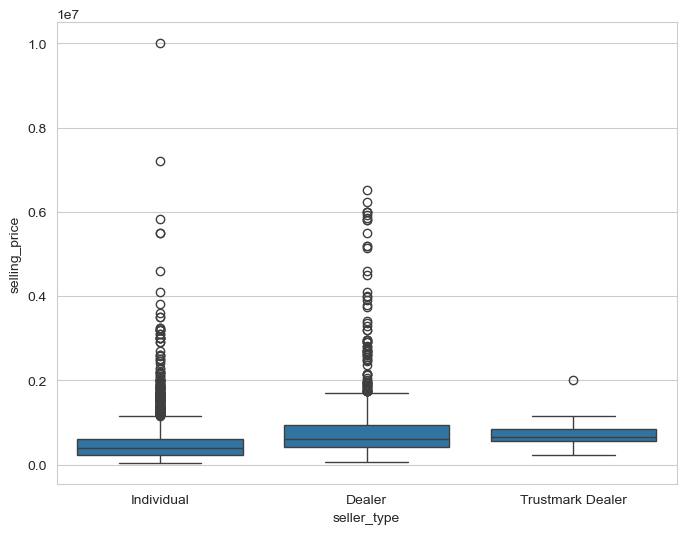

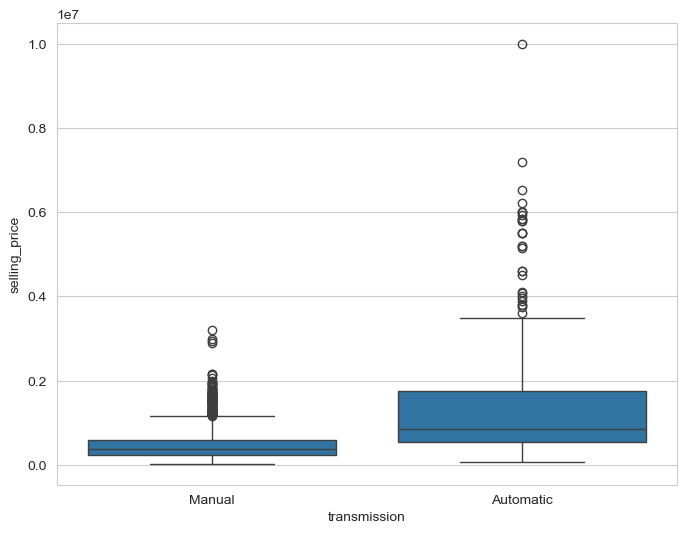

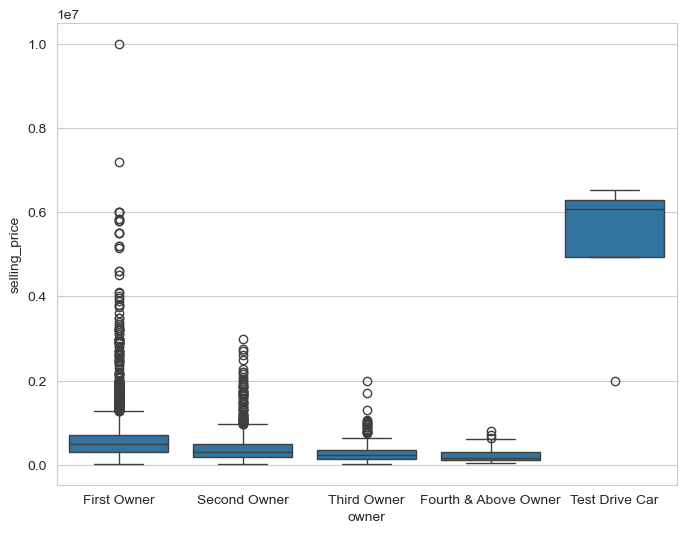

In [323]:
# your code here
cols = df_train.select_dtypes(include=['object'])
for column in cols:
    if column == 'name':
        continue
    plt.figure(figsize=(8, 6))
    _ = sns.boxplot(data=df_train, x=column, y='selling_price')

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [324]:
df_numeric_train = df_train.select_dtypes(include=['int64', 'float64'])
y_train = df_numeric_train['selling_price']
X_train = df_numeric_train.drop('selling_price', axis=1)

In [325]:
assert X_train.shape == (5840, 8) # исправил кол-во колонок на 8, т.к. не удалял torque, а добавил еще max_torque_rpm

In [326]:
df_numeric_test = df_test.select_dtypes(include=['int64', 'float64'])
y_test = df_numeric_test['selling_price']
X_test = df_numeric_test.drop('selling_price', axis=1)

In [327]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [328]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
regr = LinearRegression()
regr.fit(X_train, y_train)

y_predict = regr.predict(X_test)

# решил брать RMSE, т.к. интерпретировать ее проще
print('R_2=%.2f; RMSE=%.2f' % (r2_score(y_test, y_predict), MSE(y_test, y_predict) ** 0.5))

R_2=0.59; RMSE=482700.63


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [329]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
train_scaler = scaler.fit(X_train)
scaled_X_train = train_scaler.transform(X_train)
scaled_X_test = train_scaler.transform(X_test)

regr = LinearRegression()
regr.fit(scaled_X_train, y_train)

y_predict = regr.predict(scaled_X_test)

print('R_2=%.2f; RMSE=%.2f' % (r2_score(y_test, y_predict), MSE(y_test, y_predict) ** 0.5))

R_2=0.59; RMSE=482700.63


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [330]:
# your code here
idx = regr.coef_.argsort()
result = X_train.columns[idx][-1]
print('Признак %s оказался наиболее информативным' % result)

Признак max_power оказался наиболее информативным


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [331]:
from sklearn.linear_model import Lasso

# your code here
regr = Lasso()
regr.fit(scaled_X_train, y_train)

y_predict = regr.predict(scaled_X_test)

print('R_2=%.2f; RMSE=%.2f' % (r2_score(y_test, y_predict), MSE(y_test, y_predict) ** 0.5))

R_2=0.59; RMSE=482701.34


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [332]:
# your code here
print('Веса: %s.' % ', '.join([str(round(w)) for w in regr.coef_]))
print('Веса не занулились, потому что коэффициент регуляризации не оптимален, по умолчанию 1.')

Веса: 154468, -44299, 25206, 55775, 314396, 18014, -24447, 4089.
Веса не занулились, потому что коэффициент регуляризации не оптимален, по умолчанию 1.


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [333]:
from sklearn.model_selection import GridSearchCV

# your code here
params = {'alpha': np.logspace(0, 5, num=40)}

# your code here
gs = GridSearchCV(Lasso(), params, cv=10, scoring='r2', refit=True, verbose=1)

gs.fit(scaled_X_train, y_train)

y_predict = gs.predict(scaled_X_test)


print('R_2=%.2f; RMSE=%.2f' % (r2_score(y_test, y_predict), MSE(y_test, y_predict) ** 0.5))

Fitting 10 folds for each of 40 candidates, totalling 400 fits
R_2=0.57; RMSE=497948.03


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [334]:
# your code here
print('Грид-серчу пришлось обучать %d моделей.' % len(params['alpha']))
print('Лучший коэффициент регуляризации: %f' % gs.best_params_['alpha'])
print('Занулилось весов в количестве %d' % len(list(filter(lambda x: x==0, gs.best_estimator_.coef_))))

Грид-серчу пришлось обучать 40 моделей.
Лучший коэффициент регуляризации: 22854.638641
Занулилось весов в количестве 4


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [335]:
from sklearn.linear_model import ElasticNet

# your code here
params = {
    'alpha': np.logspace(0, 5, num=40),
    'l1_ratio': np.linspace(0.1, 1, 10)
}

gs = GridSearchCV(ElasticNet(), params, cv=10, scoring='r2', refit=True, verbose=1)

gs.fit(scaled_X_train, y_train)

y_predict = gs.predict(scaled_X_test)

print('R_2=%.2f; RMSE=%.2f' % (r2_score(y_test, y_predict), MSE(y_test, y_predict) ** 0.5))

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
R_2=0.57; RMSE=497948.03


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [336]:
# your code here
print('Лучшие гиперпараметры: %s' % ', '.join([f"{k} = {str(v)}" for k, v in gs.best_params_.items()]))

Лучшие гиперпараметры: alpha = 22854.638641349884, l1_ratio = 1.0


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [337]:
# your code here
y_train = df_train['selling_price']
X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)
y_test = df_test['selling_price']
X_test_cat = df_test.drop(['name', 'selling_price'], axis=1)

In [338]:
assert X_train_cat.shape == (5840, 12) # опять добавил в тестовую выборку 2 колонки из-за torque и max_torque_rpm

In [339]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [340]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

def get_category_feat_seats(frame: pd.DataFrame):
    return frame.select_dtypes(include=['object']).join(frame['seats'])

def get_train_encoder(frame):
    encoder = OneHotEncoder(drop='first')
    return encoder.fit(frame)

def get_train_scaler(frame):
    scaler = StandardScaler()
    return scaler.fit(frame)

df_train_category = get_category_feat_seats(X_train_cat)
train_encoder = get_train_encoder(df_train_category)
df_train_category_encoded = train_encoder.transform(df_train_category)
encoded_columns = train_encoder.get_feature_names_out(df_train_category.columns)
df_train_encoded = pd.DataFrame.sparse.from_spmatrix(df_train_category_encoded, columns=encoded_columns)
df_train_numeric = X_train_cat[X_train_cat.columns.difference(df_train_category.columns)]
train_scaler = get_train_scaler(df_train_numeric)
df_train_numeric = pd.DataFrame(train_scaler.transform(df_train_numeric), 
                                index=df_train_numeric.index, columns=df_train_numeric.columns)
X_train_encoded = df_train_encoded.join(df_train_numeric)

In [341]:
df_test_category = get_category_feat_seats(X_test_cat)
df_test_category_encoded = train_encoder.transform(df_test_category)
df_test_encoded = pd.DataFrame.sparse.from_spmatrix(df_test_category_encoded, columns=encoded_columns)
df_test_numeric = X_test_cat[X_test_cat.columns.difference(df_test_category.columns)]
df_test_numeric = pd.DataFrame(train_scaler.transform(df_test_numeric),
                               index=df_test_numeric.index, columns=df_test_numeric.columns)
X_test_encoded = df_test_encoded.join(df_test_numeric)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объяв
лении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

Ответ: 
* <font color='#006400'>Да, качество предсказаний улучшилось, получаем лучшую метрику $R^2$ по сравнению с предыдущими пунктами.</font>

In [342]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


# your code here
params = {
    'alpha': np.linspace(1, 100, num=100),
}

# your code here
gs = GridSearchCV(Ridge(), params, cv=10, scoring='r2', refit=True, verbose=1)

gs.fit(X_train_encoded, y_train)

y_predict = gs.predict(X_test_encoded)

print('R_2=%.2f; RMSE=%.2f' % (r2_score(y_test, y_predict), MSE(y_test, y_predict) ** 0.5))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
R_2=0.64; RMSE=451846.19


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [343]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape )

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [344]:
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')
df_test = df_test.drop_duplicates() # удалим дубликаты из тестовой выборки иначе бизнес метрика впоследствии будет неправильно работать
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [345]:
def match_name(x):
    matcher = re.match(r'(^[^\s]+)', x)
    if matcher:
        return matcher.groups(0)[0]
    return 'Unknown'

df_train['name'] = df_train['name'].apply(match_name)
df_test['name'] = df_test['name'].apply(match_name)

In [346]:
def add_new_features(frames):
    for frame in frames:
        frame['age'] = 2023 - frame['year'] + 1
        frame['km_per_year'] = frame['km_driven'] / frame['age']
        frame['max_power_per_liter'] = frame['max_power'] / frame['engine'] * 1000
        frame['fresh_owner'] = frame['owner'].apply(lambda x: 1 if x in ['First Owner', 'Second Owner', 'Test Drive Car'] else 0)

units_convert([df_train, df_test])
convert_torque([df_train, df_test])

na_columns = fetch_na_columns(df_train)
fill_median([df_train, df_test], na_columns)

convert([df_train, df_test], ['engine', 'seats'], int)

add_new_features([df_train, df_test])

In [347]:
y_train = df_train['selling_price']
X_train_name = df_train['name']
X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)
y_test = df_test['selling_price']
X_test_name = df_test['name']
X_test_cat = df_test.drop(['name', 'selling_price'], axis=1)

In [348]:
!pip install category_encoders -q

In [349]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
from category_encoders.leave_one_out import LeaveOneOutEncoder

# your code here

def get_category_feat_seats(frame: pd.DataFrame):
    return frame.select_dtypes(include=['object']).join(frame['seats'])

def get_train_encoder(frame):
    encoder = OneHotEncoder(drop='first')
    return encoder.fit(frame)

def get_train_loo_encoder(X, y):
    loo_enc = LeaveOneOutEncoder(sigma=0.3)
    return loo_enc.fit(X, y)

def get_train_scaler(frame):
    scaler = StandardScaler()
    return scaler.fit(frame)

df_train_category = get_category_feat_seats(X_train_cat)
train_encoder = get_train_encoder(df_train_category)
df_train_category_encoded = train_encoder.transform(df_train_category)
encoded_columns = train_encoder.get_feature_names_out(df_train_category.columns)
df_train_encoded = pd.DataFrame.sparse.from_spmatrix(df_train_category_encoded, columns=encoded_columns)
df_train_numeric = X_train_cat[X_train_cat.columns.difference(df_train_category.columns)]
train_loo_encoder = get_train_loo_encoder(X_train_name, y_train)
df_train_numeric['name'] = train_loo_encoder.transform(X_train_name)
train_scaler = get_train_scaler(df_train_numeric)
df_train_numeric = pd.DataFrame(train_scaler.transform(df_train_numeric),
                                index=df_train_numeric.index, columns=df_train_numeric.columns)
X_train_encoded = df_train_encoded.join(df_train_numeric)

In [350]:
df_test_category = get_category_feat_seats(X_test_cat)
df_test_category_encoded = train_encoder.transform(df_test_category)
df_test_encoded = pd.DataFrame.sparse.from_spmatrix(df_test_category_encoded, columns=encoded_columns)
df_test_numeric = X_test_cat[X_test_cat.columns.difference(df_test_category.columns)]
df_test_numeric['name'] = train_loo_encoder.transform(X_test_name)
df_test_numeric = pd.DataFrame(train_scaler.transform(df_test_numeric),
                               index=df_test_numeric.index, columns=df_test_numeric.columns)
X_test_encoded = df_test_encoded.join(df_test_numeric)

In [351]:
# your code here

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# your code here
params = {
    'alpha': np.linspace(1, 100, num=100),
}

# your code here
gs = GridSearchCV(Ridge(), params, cv=10, scoring='r2', refit=True, verbose=1)

gs.fit(X_train_encoded, y_train_log)

y_predict_log = gs.predict(X_test_encoded)

print('R_2=%.2f; RMSE=%.2f' % (r2_score(y_test_log, y_predict_log), MSE(y_test_log, y_predict_log) ** 0.5))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
R_2=0.87; RMSE=0.29


In [352]:
import pickle
from pathlib import Path


def serialize(train_encoder=train_encoder,
              train_scaler=train_scaler,
              train_loo_encoder=train_loo_encoder,
              model=gs):
    for item in locals().items():
        pickle.dump(item[1], open(f"{Path.cwd().parent.as_posix()}/models/{item[0]}.pkl", 'wb'))

# serialize()

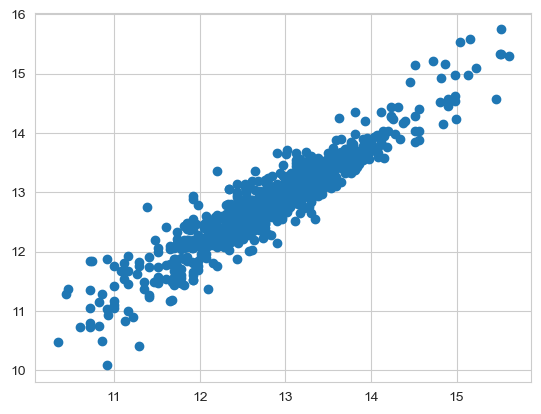

In [353]:
_ = plt.scatter(y_test_log, y_predict_log)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [354]:
def business_metrics(y_true, y_pred, fraction):
    # your code here
    count_ls_10 = 0
    for t, p in zip(y_true, y_pred):
        if t + t * fraction >= p >= t - t * fraction:
            count_ls_10 += 1
    return count_ls_10 / len(y_true)

y_predict = np.exp(y_predict_log)

metric = business_metrics(y_test, y_predict, 0.1)

print('От реальных цен не более чем на 10%% отличается %.2f%% предсказаний.' % (metric * 100))

От реальных цен не более чем на 10% отличается 30.06% предсказаний.


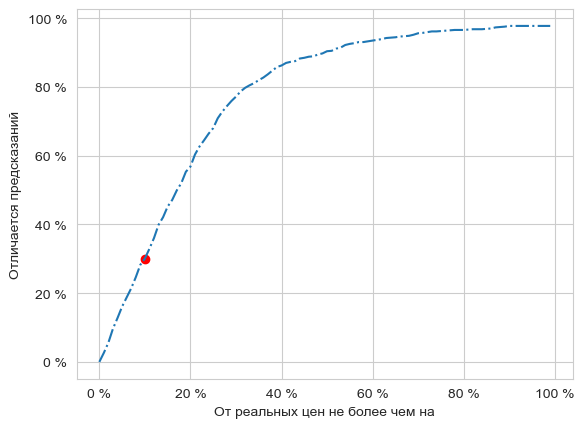

In [355]:
from matplotlib.ticker import FormatStrFormatter

x = np.arange(0, 1, 0.01)
y = [business_metrics(y_test, y_predict, i) * 100 for i in x]

plt.plot(10, business_metrics(y_test, y_predict, 0.1) * 100, 'ro')
plt.xlabel('От реальных цен не более чем на')
plt.ylabel('Отличается предсказаний')
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d %%'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d %%'))
_ = plt.plot(x * 100, y, linestyle='dashdot')

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [356]:
# from fastapi import FastAPI
# from pydantic import BaseModel
# from typing import List
#
# app = FastAPI()
#
#
# class Item(BaseModel):
#     name: str
#     year: int
#     selling_price: int
#     km_driven: int
#     fuel: str
#     seller_type: str
#     transmission: str
#     owner: str
#     mileage: str
#     engine: str
#     max_power: str
#     torque: str
#     seats: float
#
#
# class Items(BaseModel):
#     objects: List[Item]
#
#
# @app.post("/predict_item")
# def predict_item(item: Item) -> float:
#     return ...
#
#
# @app.post("/predict_items")
# def predict_items(items: List[Item]) -> List[float]:
#     return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link